In [38]:
from general_functions import get_cities, plot_loss_history, plot_final_path
from genetic_algo import genetic_algorithm
from sim_an_algo import simulated_annealing
import time

We'll play around with 

Let's consider an example for which optimal path is visible (most of the times). So, the number of cities is around 8.

In [39]:
cities = get_cities('tsp_exp_8', use_existing=True, num_cities=8)

In [40]:
num_iter = 1_000
num_pop = 10
num_fittest = 2
early_stopping = True
stopping_threshold = 1e-8
start = time.time()
best_route_gen, history_gen = genetic_algorithm(cities, num_iter = num_iter, early_stopping = early_stopping, num_pop = num_pop,
                                                num_fittest = num_fittest, stopping_threshold = stopping_threshold)
end = time.time()

Iter    0 | Best Distance: 365.0651
Iter   10 | Best Distance: 314.9486
Early stopping at iteration 11 (improvement < 1e-08)


In [41]:
start - end

-0.056847572326660156

This seems okay (almost optimal).

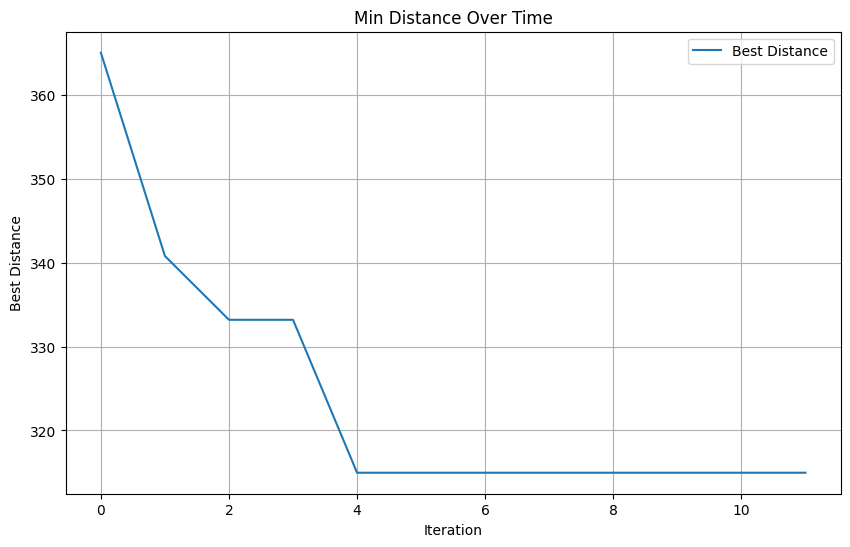

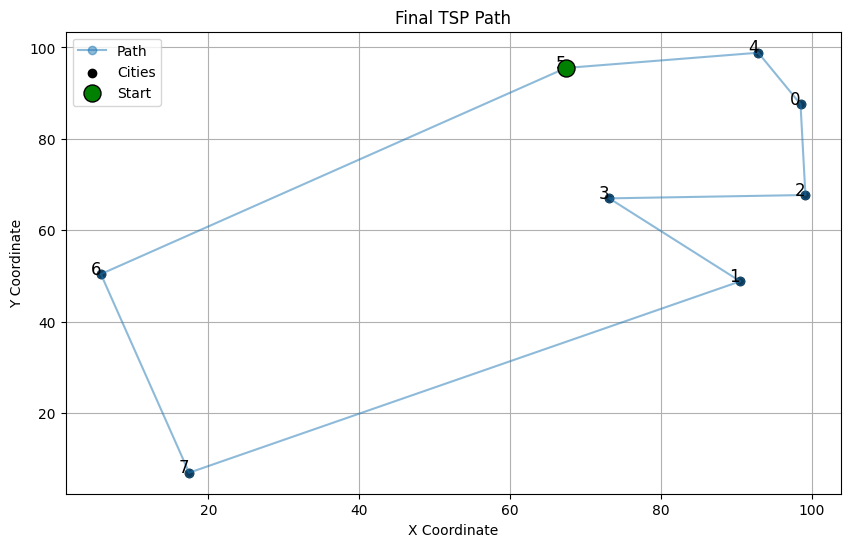

In [42]:
plot_loss_history(history_gen)
plot_final_path(cities, best_route_gen)

Now, let's increase number of elements per population.

Iter    0 | Best Distance: 395.3985
Iter   10 | Best Distance: 306.7156
Early stopping at iteration 11 (improvement < 1e-08)


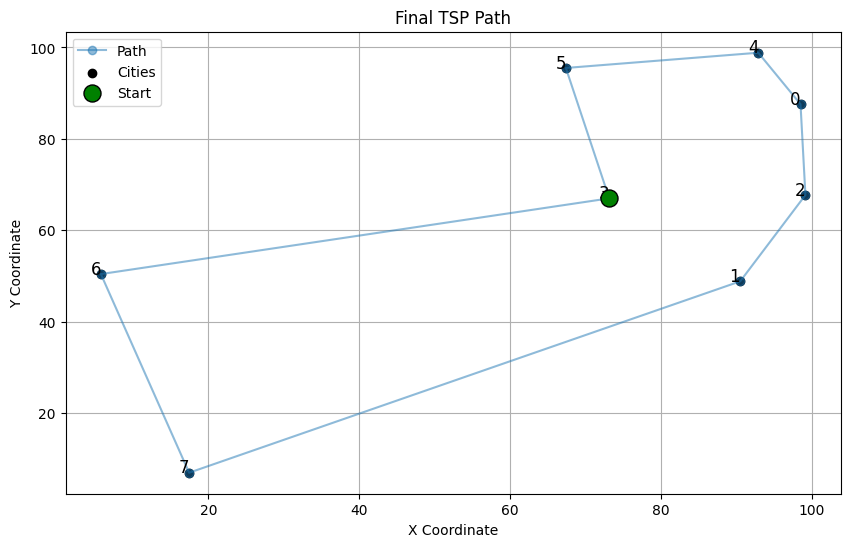

In [43]:
num_pop = 30
num_fittest = 2
start = time.time()
best_route_gen, history_gen = genetic_algorithm(cities, num_iter = num_iter, early_stopping = early_stopping, num_pop = num_pop,
                                                num_fittest = num_fittest, stopping_threshold = stopping_threshold)
end = time.time()
plot_final_path(cities, best_route_gen)

This seems more optimal than the previous one.

So, number of elements per population is indeed important. That's why an euristics was used:

`pop_size = max(50, min(10 * num_cities, 5000))`

So that `pop_size` would be between 50 and 5000.

Now, let's consider simulated annealing for the same set of cities.

In [44]:
initial_temp = 10000
cooling_rate = 0.95
min_temp = 0.00001
verbose = True
early_stopping = True
patience = 500
best_route_sim, history_sim = simulated_annealing(cities, initial_temp=initial_temp, cooling_rate=cooling_rate,
                                                  min_temp=min_temp, early_stopping=early_stopping, patience=patience)

Temp: 6302.49 | Current Cost: 504.25 | Best Cost: 400.32 | Iteration number: 10
Temp: 3773.54 | Current Cost: 389.06 | Best Cost: 389.06 | Iteration number: 20
Temp: 2259.36 | Current Cost: 521.31 | Best Cost: 382.46 | Iteration number: 30
Temp: 1352.76 | Current Cost: 435.38 | Best Cost: 369.23 | Iteration number: 40
Temp: 809.95 | Current Cost: 542.51 | Best Cost: 358.59 | Iteration number: 50
Temp: 484.95 | Current Cost: 502.49 | Best Cost: 338.48 | Iteration number: 60
Temp: 290.35 | Current Cost: 432.28 | Best Cost: 338.48 | Iteration number: 70
Temp: 173.85 | Current Cost: 403.02 | Best Cost: 338.48 | Iteration number: 80
Temp: 104.09 | Current Cost: 405.86 | Best Cost: 338.48 | Iteration number: 90
Temp: 62.32 | Current Cost: 369.29 | Best Cost: 338.48 | Iteration number: 100
Temp: 37.31 | Current Cost: 387.61 | Best Cost: 338.48 | Iteration number: 110
Temp: 22.34 | Current Cost: 357.12 | Best Cost: 338.48 | Iteration number: 120
Temp: 13.38 | Current Cost: 379.99 | Best Cost: 

As you can see, this path is different. So, methods can provide different results.

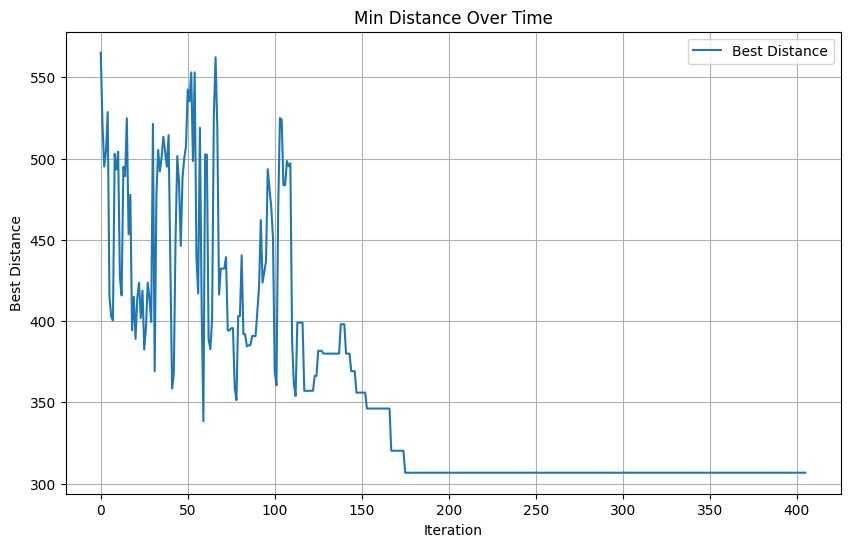

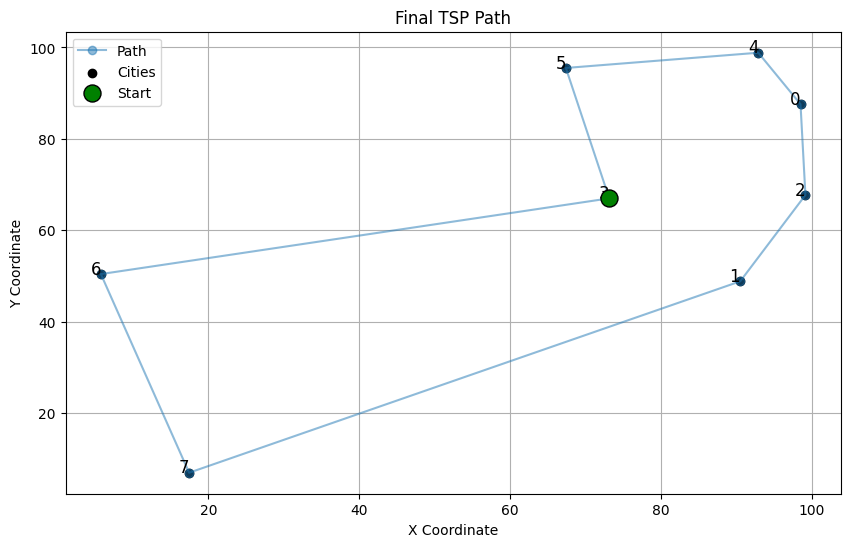

In [45]:
plot_loss_history(history_sim)
plot_final_path(cities, best_route_sim)

Now, let's increase number of cities to 30 and compare visually solutions (genetic vs annealing) for a couple of city-sets. 

In [52]:
cities = get_cities('tsp_exp_30', use_existing=False, num_cities=30)

In [62]:
num_iter = 10_000
num_fittest = 5
early_stopping = True
stopping_threshold = 1e-8
start = time.time()
best_route_gen, history_gen = genetic_algorithm(cities, num_iter = num_iter, early_stopping = early_stopping,
                                                num_fittest = num_fittest, stopping_threshold = stopping_threshold)
end = time.time()
print(end - start)

Auto-set population size to 300 based on 30 cities
Iter    0 | Best Distance: 1099.8352
Iter   10 | Best Distance: 816.1862
Early stopping at iteration 12 (improvement < 1e-08)
17.782564401626587


In [63]:
initial_temp = 15_000
cooling_rate = 0.90
min_temp = 0.00001
verbose = True
early_stopping = True
patience = 500
start = time.time()
best_route_sim, history_sim = simulated_annealing(cities, initial_temp=initial_temp, cooling_rate=cooling_rate,
                                                  min_temp=min_temp, early_stopping=early_stopping, patience=patience)
end = time.time()
print(end - start)

Temp: 5811.31 | Current Cost: 1552.27 | Best Cost: 1420.38 | Iteration number: 10
Temp: 2026.28 | Current Cost: 1482.91 | Best Cost: 1420.38 | Iteration number: 20
Temp: 706.52 | Current Cost: 1357.62 | Best Cost: 1357.62 | Iteration number: 30
Temp: 246.35 | Current Cost: 1343.84 | Best Cost: 1343.84 | Iteration number: 40
Temp: 85.90 | Current Cost: 1173.77 | Best Cost: 1128.82 | Iteration number: 50
Temp: 29.95 | Current Cost: 1229.12 | Best Cost: 1128.82 | Iteration number: 60
Temp: 10.44 | Current Cost: 1172.54 | Best Cost: 1128.82 | Iteration number: 70
Temp: 3.64 | Current Cost: 1066.18 | Best Cost: 1066.18 | Iteration number: 80
Temp: 1.27 | Current Cost: 1065.21 | Best Cost: 1065.21 | Iteration number: 90
Temp: 0.44 | Current Cost: 1026.85 | Best Cost: 1026.85 | Iteration number: 100
Temp: 0.15 | Current Cost: 989.76 | Best Cost: 989.76 | Iteration number: 110
Temp: 0.05 | Current Cost: 980.67 | Best Cost: 980.67 | Iteration number: 120
Temp: 0.02 | Current Cost: 968.06 | Best

In [64]:
import numpy as np
print(f"Best result for Simulated Annealing {np.sort(history_sim)[0]:.2f} vs Genetic {np.sort(history_gen)[0]:.2f}")

Best result for Simulated Annealing 717.92 vs Genetic 774.72


Genetic algo results:

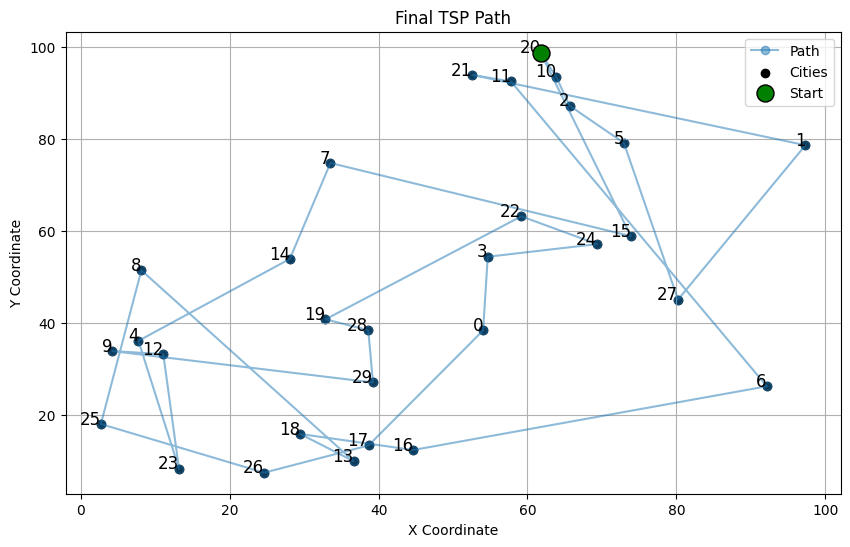

In [65]:
plot_final_path(cities, best_route_gen)

Simulated annealing results:

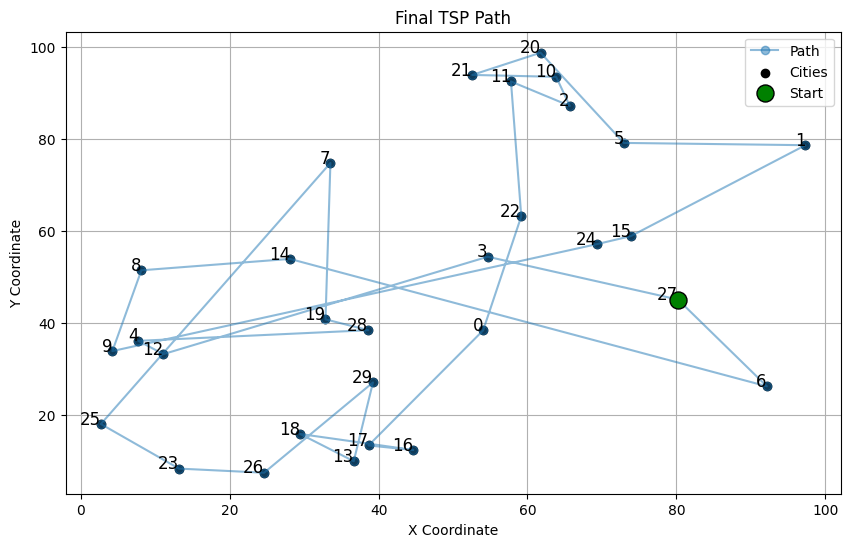

In [66]:
plot_final_path(cities, best_route_sim)